In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing all the required libraries

In [6]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from keras.applications.resnet import ResNet50


### Resizing the images into (256 * 256)

In [7]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass

def assign_label(img,label):
    return label

In [8]:
X=[]
Z=[]
IMG_SIZE=256
Plain='/content/drive/MyDrive/BTP/Distress detection/My Dataset/train/Plain'
Pothole='/content/drive/MyDrive/BTP/Distress detection/My Dataset/train/Pothole'

make_train_data('Plain',Plain)
make_train_data('Pothole',Pothole)

100%|██████████| 81/81 [00:30<00:00,  2.67it/s]


### Splitting the data into Training and Validation data

In [9]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)

np.random.seed(42)
rn.seed(42)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

### Building the CNN model using RESNET (pretrained model)

In [10]:
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')
base_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [11]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [12]:
epochs=50
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # setting the VGG model to be trainable.
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 30,408,066
Trainable params: 30,354,946
No

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/50
11/11 [==============================] - 26s 792ms/step - loss: 1.7929 - accuracy: 0.6707 - val_loss: 1.1817 - val_accuracy: 0.8571
Epoch 2/50
11/11 [==============================] - 4s 375ms/step - loss: 0.5763 - accuracy: 0.8832 - val_loss: 0.3382 - val_accuracy: 0.8482
Epoch 3/50
11/11 [==============================] - 4s 403ms/step - loss: 0.2203 - accuracy: 0.9281 - val_loss: 0.3266 - val_accuracy: 0.8839
Epoch 4/50
11/11 [==============================] - 4s 376ms/step - loss: 0.0609 - accuracy: 0.9701 - val_loss: 0.4092 - val_accuracy: 0.8839
Epoch 5/50
11/11 [==============================] - 4s 376ms/step - loss: 0.0850 - accuracy: 0.9701 - val_loss: 0.2841 - val_accuracy: 0.9107
Epoch 6/50
11/11 [==============================] - 4s 402ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.2278 - val_accuracy: 0.9196
Epoch 7/50
11/11 [==============================] - 4s 404ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.2204 - val_accuracy: 0.9196
Epoch

### Saving the trained model

In [14]:
model.save('../working/model.h5')

### Model Accuracy

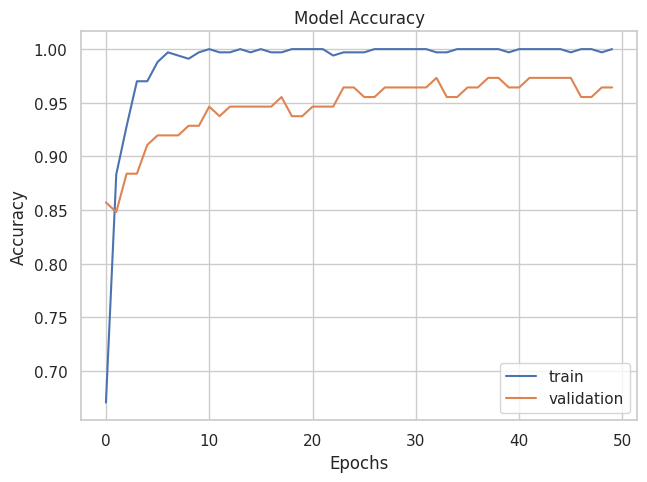

In [15]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### Model Loss

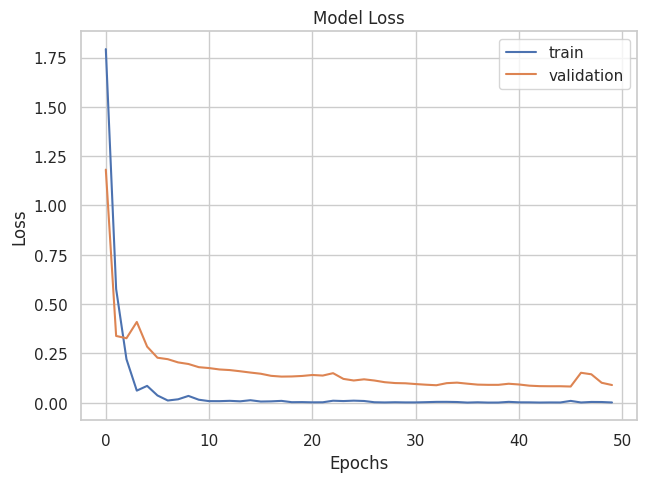

In [16]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### Testing the trained model

In [17]:
# Create output folders if they don't exist
output_folder_plain = "Plain_Road"
output_folder_pothole = "Pothole_Road"

if not os.path.exists(output_folder_plain):
    os.makedirs(output_folder_plain)

if not os.path.exists(output_folder_pothole):
    os.makedirs(output_folder_pothole)
path = '/content/drive/MyDrive/Road Images/'
files = os.listdir(path)

for i in tqdm(files):
    pth = os.path.join(path, i)
    X = cv2.imread(pth, cv2.IMREAD_COLOR)
    X = cv2.resize(X, (256, 256))

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if y_pred[0][0] == 1:
        # Save to Plain Road folder
        output_path = os.path.join(output_folder_plain, i)
        cv2.imwrite(output_path, X[0])
    else:
        # Save to Pothole Road folder
        output_path = os.path.join(output_folder_pothole, i)
        cv2.imwrite(output_path, X[0])



  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  6%|▋         | 1/16 [00:02<00:30,  2.02s/it]

1/1 [==============================] - 0s 36ms/step


 12%|█▎        | 2/16 [00:02<00:14,  1.02s/it]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 3/16 [00:02<00:09,  1.31it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 4/16 [00:03<00:07,  1.68it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███▏      | 5/16 [00:03<00:05,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 6/16 [00:03<00:04,  2.39it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 7/16 [00:03<00:03,  2.70it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 8/16 [00:04<00:02,  2.92it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 9/16 [00:04<00:02,  2.65it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▎   | 10/16 [00:05<00:02,  2.82it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 11/16 [00:05<00:02,  2.46it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 12/16 [00:05<00:01,  2.66it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 13/16 [00:06<00:01,  2.86it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 14/16 [00:06<00:00,  2.94it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 15/16 [00:06<00:00,  2.90it/s]

1/1 [==============================] - 0s 28ms/step


100%|██████████| 16/16 [00:07<00:00,  2.26it/s]
